In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(city_df, ride_df, how="left", on='city')

# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
drivergroup = combined_df.groupby(["type","city"])
drivertotal = drivergroup['driver_count'].sum()
drivertotal

type      city                
Rural     Bradshawfurt              70
          Garzaport                 21
          Harringtonfort            24
          Jessicaport                6
          Lake Jamie                24
          Lake Latoyabury           22
          Michaelberg               72
          New Ryantown              12
          Newtonview                 4
          North Holly               72
          North Jaime                8
          Penaborough               30
          Randallchester            45
          South Jennifer            49
          South Marychester          8
          South Saramouth           28
          Taylorhaven                6
          West Heather              36
Suburban  Barronchester            176
          Bethanyland              396
          Brandonfort              190
          Colemanland              506
          Davidfurt                391
          East Aaronbury            63
          East Danielview        

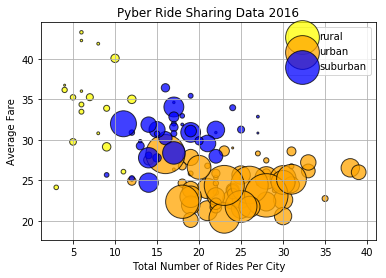

In [3]:
# Obtain the x and y coordinates for each of the three city types



y = combined_df.groupby(["type","city"]).mean()
x = combined_df.groupby(["type","city"]).count()

x_rural = x.loc["Rural","fare"]
y_rural = y.loc["Rural","fare"]



x_urban = x.loc["Urban","fare"]
y_urban = y.loc["Urban","fare"]


x_suburban = x.loc["Suburban","fare"]
y_suburban = y.loc["Suburban","fare"]


# Build the scatter plots for each city types
plt.scatter(x_rural,y_rural,marker="o",facecolors="yellow",edgecolors="black",alpha=0.75, s = drivertotal,label='rural')
plt.scatter(x_urban,y_urban,marker="o",facecolors="orange",edgecolors="black",alpha=0.75,s = drivertotal,label='urban')
plt.scatter(x_suburban,y_suburban,marker="o",facecolors="blue",edgecolors="black",alpha=0.75,s = drivertotal,label='suburban')
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare")
# Create a legend
plt.grid()
plt.legend(loc="best")
plt.Text(50,0.5,'Note: Circle size correlates with driver count per city')
# Incorporate a text label regarding circle size

# Save Figure zsxdcv
plt.savefig("../Images/IceCreamSales.png")

## Total Fares by City Type

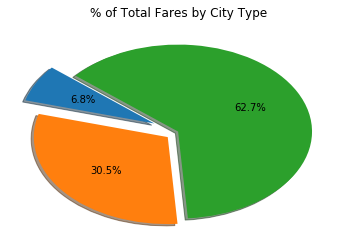

In [5]:
# Calculate Type Percents


explode = (.2,.1,0)

citygroup = combined_df.groupby(["type"])
totalfaretype = citygroup['fare'].sum()


# Build Pie Chart
plt.pie(totalfaretype, autopct="%1.1f%%",explode=explode,shadow=True,startangle=140)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Images/Total Fares by City.png")

## Total Rides by City Type

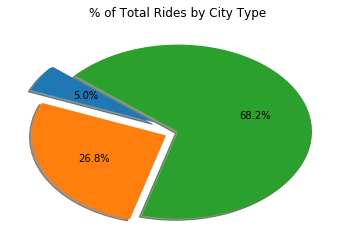

In [39]:

explode = (.2,.1,0)

citygroup = combined_df.groupby(["type"])
totalridetype = citygroup['ride_id'].sum()


# Build Pie Chart
plt.pie(totalridetype, autopct="%1.1f%%",explode=explode,shadow=True,startangle=140)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Images/Total Rides by City.png")


## Total Drivers by City Type

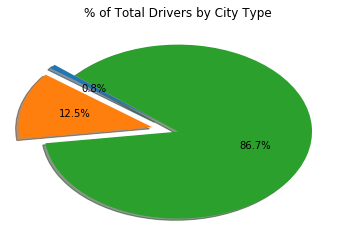

In [143]:
explode = (.2,.2,0)

citygroup = combined_df.groupby(["type"])
totaldrivetype = citygroup['driver_count'].sum()


# Build Pie Chart
plt.pie(totaldrivetype, autopct="%1.1f%%",explode=explode,shadow=True,startangle=140)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Images/Total Drivers by City.png")
